In [99]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=columns)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [100]:
import numpy as np
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric)
df.fillna(df.median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


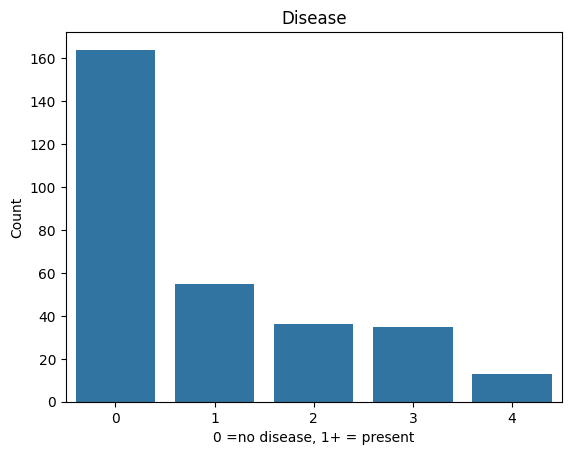

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df["target"])
plt.title("Disease")
plt.xlabel("0 =no disease, 1+ = present")
plt.ylabel("Count")
plt.show()


In [102]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop("target",axis = 1)

In [ ]:
y =df["target"]

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)


PRINT THE TEST AND TRAINING SAMPLES:


---



In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
print(X_test.shape, y_test.shape)

# Training Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Initialize the Random Forest


In [ ]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rfmodel.fit(X_train, y_train)


y_pred = rfmodel.predict(X_test)

accuracy =accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestClassifier(random_state =42)

In [ ]:
gs = GridSearchCV(rf, param_grid, cv = 5, scoring='accuracy', n_jobs= -1)
gs.fit(X_train, y_train)

In [ ]:
print("Best Parameters:", gs.best_params_)


In [ ]:
best= gs.best_estimator_
y_pred_best = best.predict(X_test)

In [ ]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Improved Model Accuracy: {accuracy_best:.2f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
importances = best.feature_importances_
feature_names = X.columns

# Sort and visualize
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
import joblib
joblib.dump(best, 'heart_disease_model.pkl')
print("Model saved successfully!")

In [ ]:
# Load the model
loaded_model = joblib.load('heart_disease_model.pkl')

# Make predictions on new data (example)
sample_data = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]  # Example input
prediction = loaded_model.predict(sample_data)

print("Prediction:", "Heart Disease" if prediction[0] == 1 else "No Heart Disease")
